In [3]:
from src.datasets import NoisySpeechDataset
from src.utils import checkpoint
from src.utils.notebook import Sampler, visualize_audio 

In [4]:
dataset = NoisySpeechDataset(train=False, quiet=True)

In [85]:
# CHECKPOINT = 'wave-u-net-mse-onlyy-1573200273.full.ckpt'
# CHECKPOINT = 'wave-u-net-feature-loss-only-1573203595.full.ckpt'
CHECKPOINT = 'wave-u-net-mse-gan-feature-losses-1573224098.full.ckpt'
# CHECKPOINT = 'wave-u-net-l1-only-1573378184.full.ckpt'

In [86]:
net = checkpoint.load(CHECKPOINT, use_cuda=False)
net = net.eval()
sampler = Sampler(net, dataset)

In [210]:
HARD = 1 # 2 3 
EASY = 200
IDX = HARD
noisy_arr, clean_arr, pred_clean, pred_noise, true_noise = sampler.get_results(IDX)

In [211]:
clean_arr.shape

(32768,)

In [212]:
clean_arr[:30]

array([-0.00309205, -0.00487202, -0.00366354, -0.00373387, -0.00427026,
       -0.00353712, -0.00406474, -0.00360763, -0.0037694 , -0.0035978 ,
       -0.00358337, -0.00373429, -0.00334388, -0.00359619, -0.0032931 ,
       -0.00352514, -0.00327319, -0.00343734, -0.00320339, -0.00326842,
       -0.00321692, -0.00319785, -0.00325137, -0.00322562, -0.00331569,
       -0.00319397, -0.00336361, -0.00323713, -0.00333744, -0.00332272],
      dtype=float32)

In [213]:
pred_clean.shape

(32768,)

In [214]:
pred_clean[:30]

array([-0.00080825, -0.0004312 ,  0.00266421,  0.00412569,  0.00404512,
        0.00274609,  0.00200419,  0.00236944,  0.00423986,  0.00369215,
        0.00338183,  0.00253742,  0.0019254 ,  0.00201483,  0.00206447,
        0.00183926,  0.00162875,  0.00155242,  0.00150275,  0.0014785 ,
        0.00159168,  0.00167604,  0.00170517,  0.00188495,  0.00212704,
        0.00232741,  0.00235249,  0.00246117,  0.00248854,  0.00243522],
      dtype=float32)

Clean signal


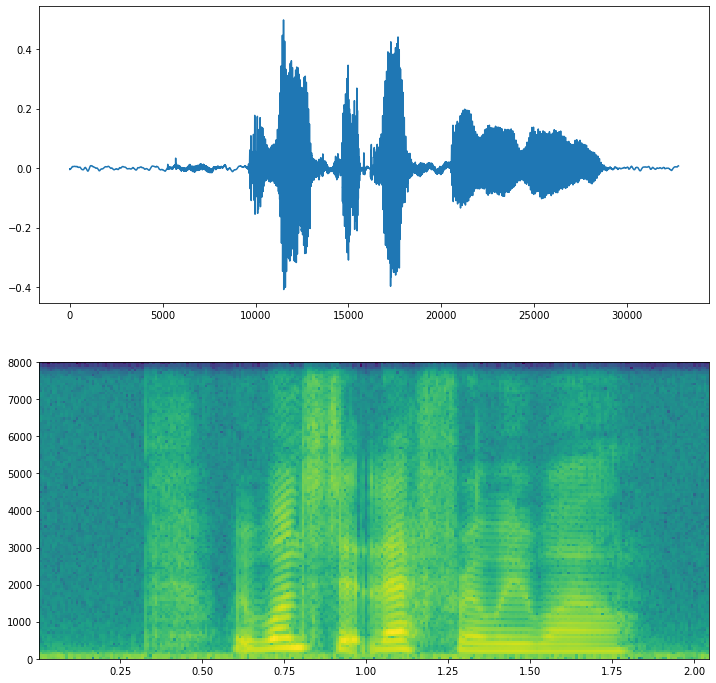

In [215]:
visualize_audio(clean_arr, 'Clean signal')

Noisy signal


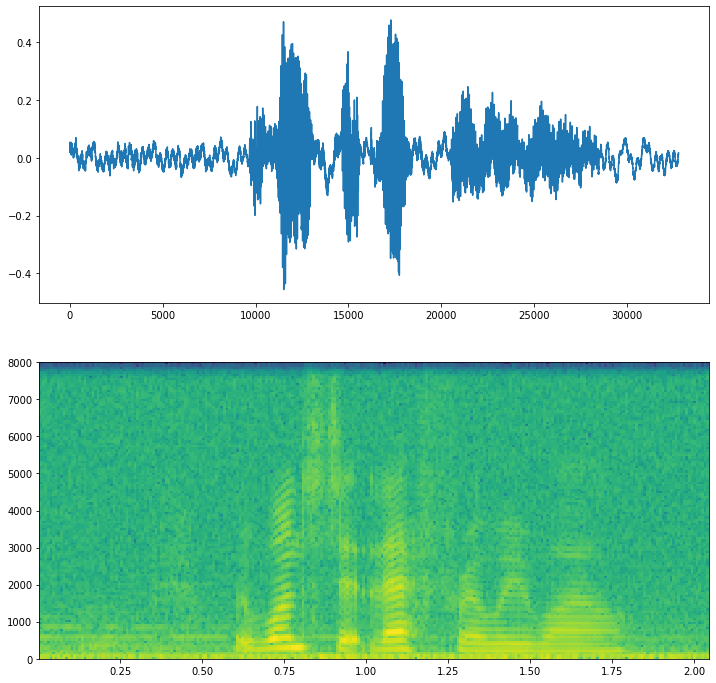

In [216]:
visualize_audio(noisy_arr, 'Noisy signal')

Predicted clean signal


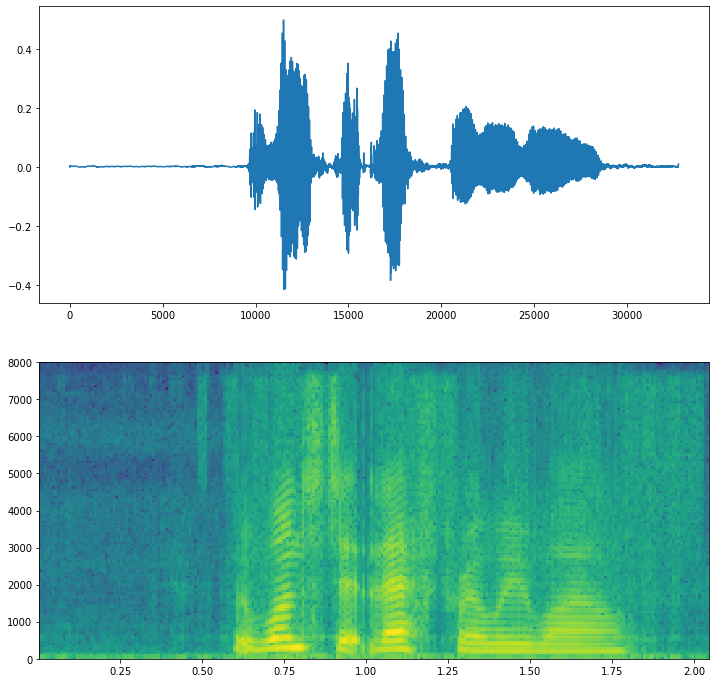

In [217]:
visualize_audio(pred_clean, 'Predicted clean signal')

Predicted noise


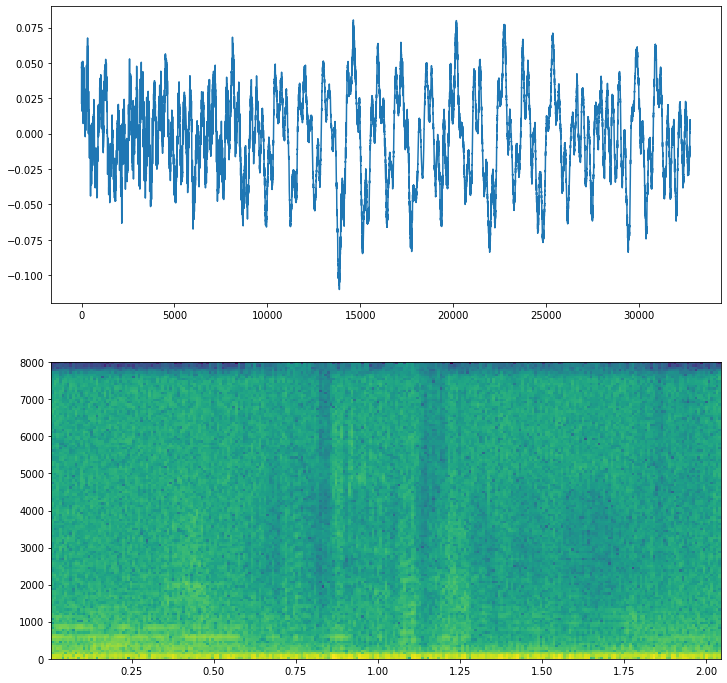

In [218]:
visualize_audio(pred_noise, 'Predicted noise')

True noise signal


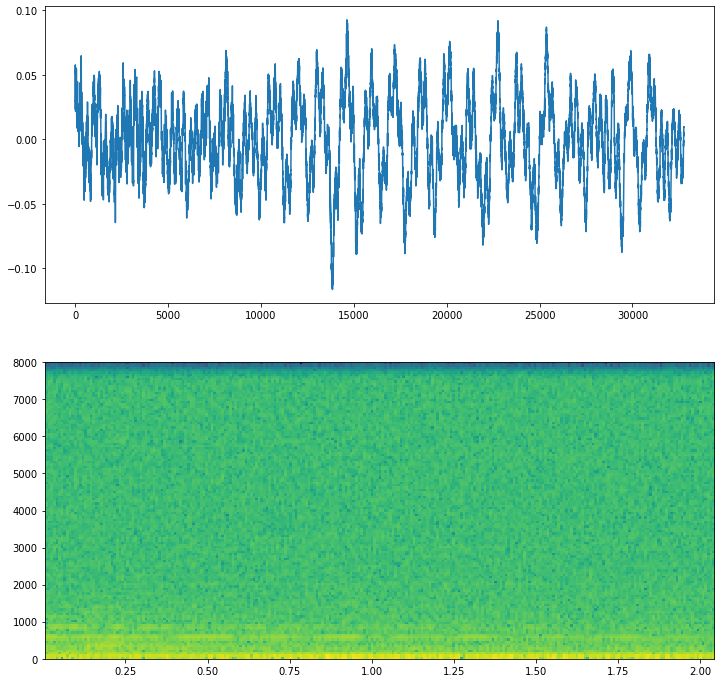

In [219]:
visualize_audio(true_noise, 'True noise signal')